In [1]:
#imports required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#Importing the Dataset
dataset = pd.read_csv('diabetes.csv')

In [3]:
#Descriptive Analysis of data set
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
# Dataset dimensions - (rows, columns)
dataset.shape

(2000, 9)

In [6]:
# Features of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

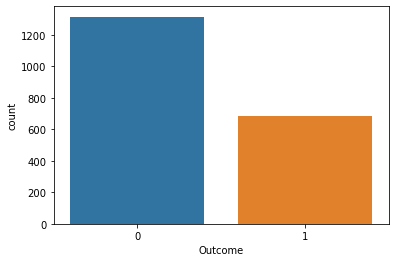

In [8]:
#Data Visualizations
sns.countplot(x = 'Outcome',data = dataset)

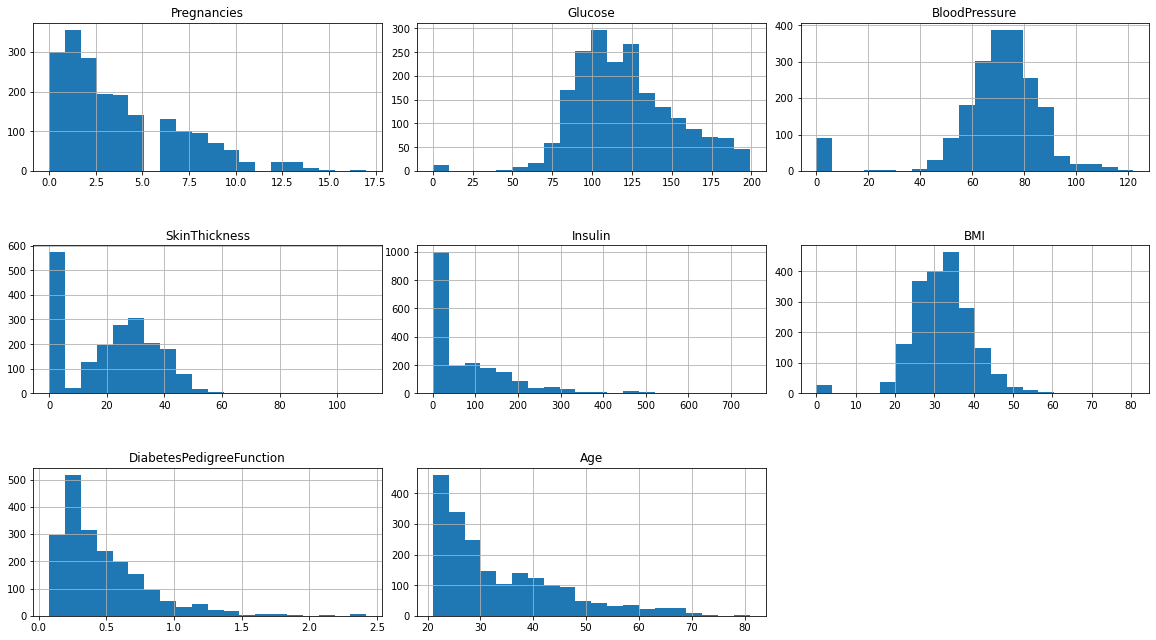

In [9]:
# Histogram of each feature
import itertools
col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int(length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

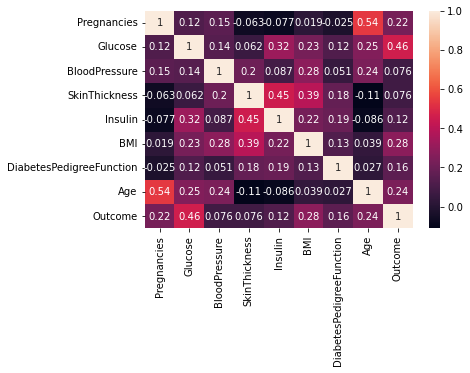

In [10]:
#visualizing the correlation between different features 
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [11]:
#Data Preprocessing
# Count of NaN values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Replace zero values with NaN
dataset.iloc[:, 0:7] = dataset.iloc[:, 0:7].replace(0, pd.np.nan)

C:\Users\user\AppData\Local\Temp\ipykernel_1364\434171229.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  dataset.iloc[:, 0:7] = dataset.iloc[:, 0:7].replace(0, pd.np.nan)


In [13]:
# Count of NaN
dataset.isnull().sum()

Pregnancies                 301
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          2.0    138.0           62.0           35.0      NaN  33.6   
1          NaN     84.0           82.0           31.0    125.0  38.2   
2          NaN    145.0            NaN            NaN      NaN  44.2   
3          NaN    135.0           68.0           42.0    250.0  42.3   
4          1.0    139.0           62.0           41.0    480.0  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


In [15]:
# Replacing NaN with mean values
dataset["Pregnancies"].fillna(dataset["Pregnancies"].mean(), inplace = True)
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [16]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.000000,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,4.359623,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,4.359623,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,4.359623,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1.000000,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


In [17]:
#Feature Selection
#split dataset in feature vector and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = dataset[feature_cols] # Features
y = dataset.Outcome # Target variable


In [18]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [19]:
# Create Decision Tree classifer 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [20]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [21]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[233  36]
 [ 50  81]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       269
           1       0.69      0.62      0.65       131

    accuracy                           0.79       400
   macro avg       0.76      0.74      0.75       400
weighted avg       0.78      0.79      0.78       400



In [23]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.785


In [24]:
!pip install pydotplus

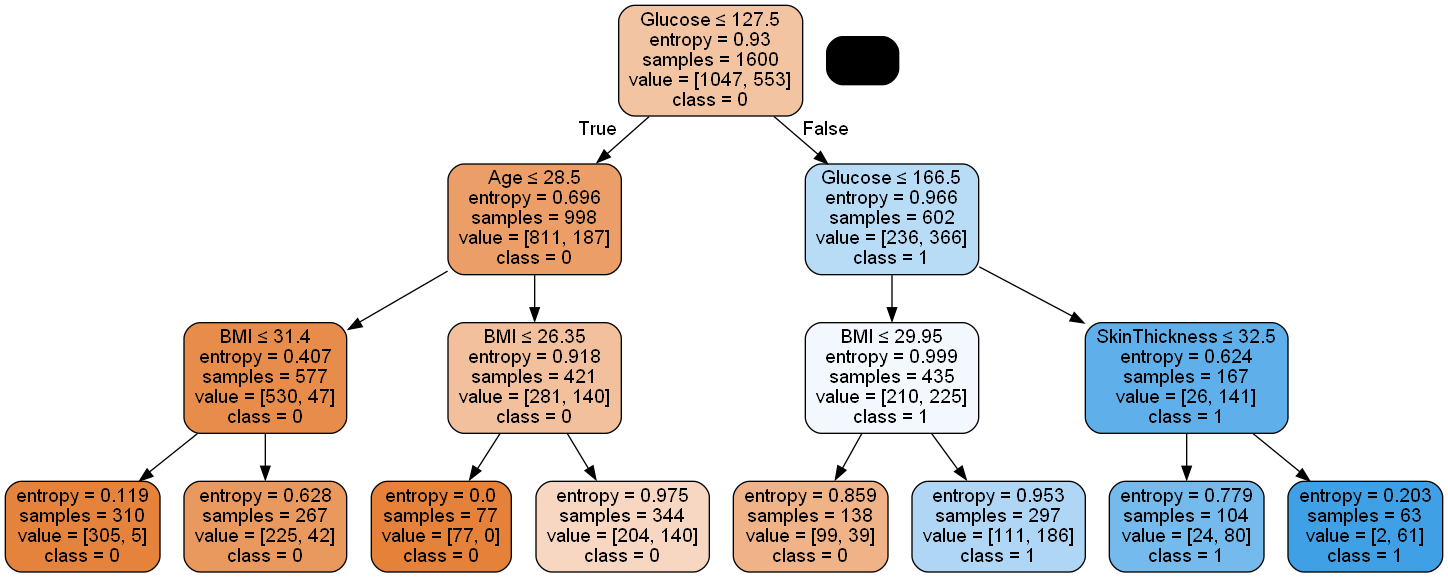

In [25]:
#Visualizing the Tree
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [26]:
# Assuming X_new is the sample row data
X_new = [[2.000000,138.0,62.000000,35.000000,153.743295,33.6,0.127,47]]

# Predict the outcome using the trained model
y_new_pred = clf.predict(X_new)

# Print the predicted outcome (0 = not diabetic, 1 = diabetic)
print(y_new_pred)

[1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
dataset.head(1000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.000000,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,4.359623,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,4.359623,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,4.359623,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1.000000,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
995,4.359623,127.0,80.000000,37.000000,210.000000,36.3,0.804,23,0
996,3.000000,129.0,92.000000,49.000000,155.000000,36.4,0.968,32,1
997,8.000000,100.0,74.000000,40.000000,215.000000,39.4,0.661,43,1
998,3.000000,128.0,72.000000,25.000000,190.000000,32.4,0.549,27,1


In [28]:
dataset.head(2000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.000000,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,4.359623,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,4.359623,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,4.359623,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1.000000,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2.000000,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8.000000,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6.000000,85.0,78.000000,29.341275,153.743295,31.2,0.382,42,0
1998,4.359623,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


In [29]:
# Assuming X_new is the sample row data
X_new = [[2.000000,75.0,64.000000,24.000000,55.000000,29.7,0.370,33]]

# Predict the outcome using the trained model
y_new_pred = clf.predict(X_new)

# Print the predicted outcome (0 = not diabetic, 1 = diabetic)
print(y_new_pred)

[0]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


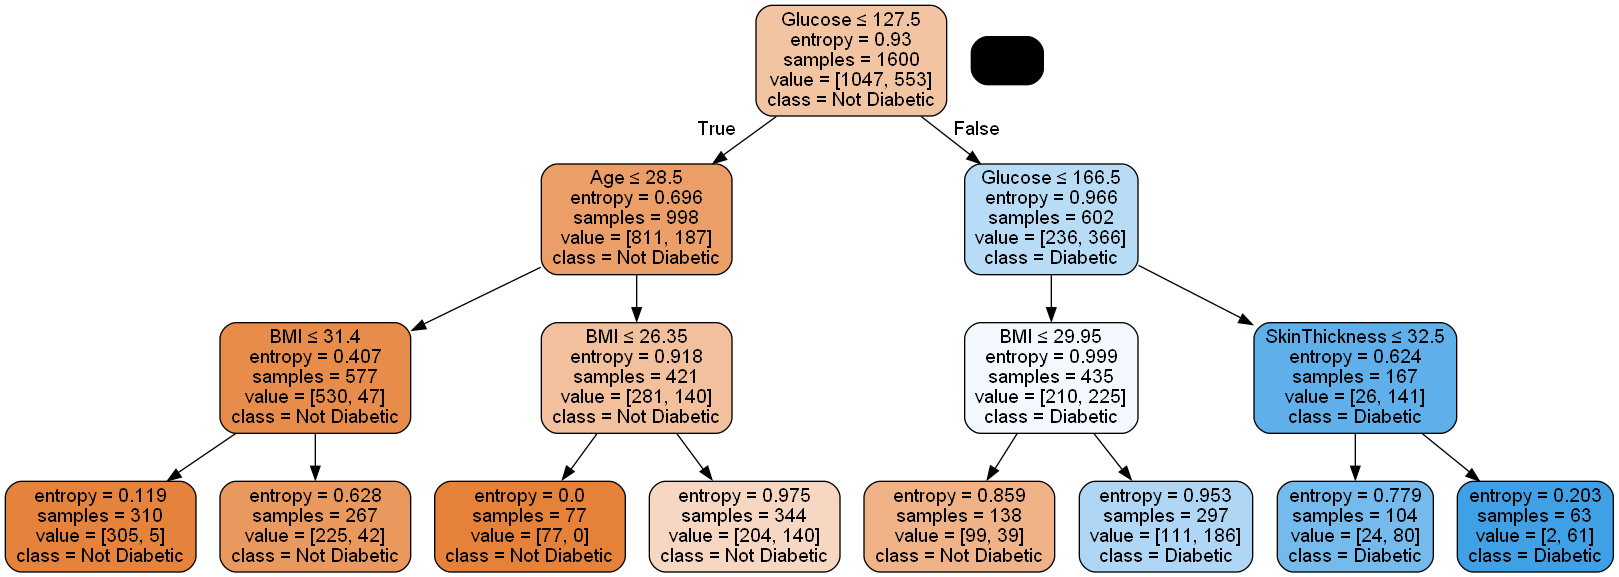

In [31]:
#Visualizing the Tree
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Not Diabetic','Diabetic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())